# Solution hints for exercise sheet 5

## Exercise 1

We are dealing with the following linear systems:
$$
A = \begin{pmatrix} -1 & 0\\ 0 & -1 \end{pmatrix},\qquad B = \begin{pmatrix} -1 & -1\\ 1 & -1 \end{pmatrix} = A + \Omega,
$$
where
$$
\Omega = \begin{pmatrix} 0 & -1\\ 1 & 0 \end{pmatrix}
$$
induces pure rotation, and $A$ induces exponential compression towards the origin. In polar coordinates, the matrix exponentials read as
$$
\exp(tA)\begin{pmatrix} r_0 \\ \theta_0 \end{pmatrix} = \begin{pmatrix} \exp(-t)r_0 \\ \theta_0 \end{pmatrix},\\
\exp(tB)\begin{pmatrix} r_0 \\ \theta_0 \end{pmatrix} = \begin{pmatrix} \exp(-t)r_0 \\ \theta_0 +t \end{pmatrix}.
$$
The spectra of $A$ and $B$ are $\lbrace -1\rbrace$ and $\lbrace -1\pm i\rbrace$, respectively, i.e., in both cases the eigenvalues have negative real parts and the equilibria are thus stable.

Let's take a quick look at the phase portraits.

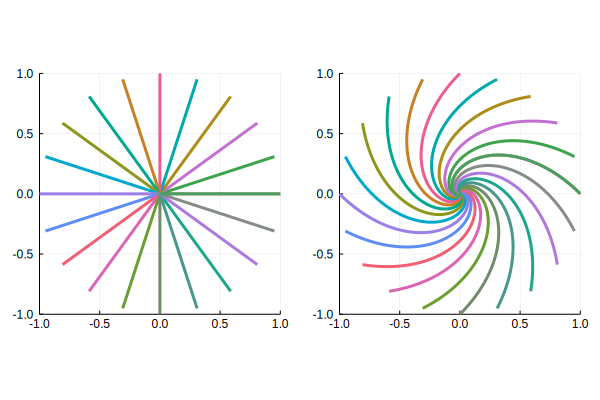

In [1]:
using OrdinaryDiffEq, Plots

A = [-1  0; 0 -1]
B = [-1 -1; 1 -1]
α = linspace(0,2π,21)
x0 = [[cos(a), sin(a)] for a in α] # this is a list of initial conditions
figs = map((A, B)) do L
    rhs = (u,p,t) -> L*u
    prob = ODEProblem(rhs,[0.0, 0.0],(0.0, 5.0))
    sol = solve(prob,Tsit5())
    fig = plot(sol,vars=(1,2),leg=false,xlims=(-1., 1.),ylims=(-1., 1.))
    for x in x0
        prob = ODEProblem(rhs,x,(0.0, 10.0))
        sol = solve(prob,Tsit5())
        plot!(sol,vars=(1,2),xlims=(-1., 1.),ylims=(-1., 1.))
    end
    fig
end
plot(figs...,aspect_ratio=1)

That's neat! The problem of showing topological equivalence corresponds to finding a homeomorphism which maps equally colored lines bijectively to each other. Moreover, the plot communicates the main idea very effectively. 

We build the topological equivalence $h$ as follows. First, the unit circle is left invariant, just like the origin. For all other points off the unit circle, we first identify the intersection point of its trajectory with the unit circle. For some $(r_0,\theta_0)$, this is given by $\exp(\tau A)(r_0,\theta_0)$ for a suitable $\tau=\log\frac{1}{r_0}$: this is the time that it takes the point $(r_0,\theta_0)$ to go to the unit circle under the backward flow induced by $A$. Under the flow induced by $B$ for time $\tau$, this point is then taken to $(r_0,\theta_0+\log\frac{1}{r_0})$. Thus, the topological conjugacy between the dynamical system induced by $A$ and the one induced by $B$ is given by
$$
(r,\theta)\mapsto (r,\theta+\log\frac{1}{r}).
$$
Geometrically, circles are left invariant, but are  sheared in counter-clockwise direction the stronger the closer one gets to the origin. This is entirely consistent with the intuition built from the above figures.

## Exercise 2

This is a somewhat easy, somewhat tedious exercise. The transformation to polar coordinates is straightforward. The solution of the resulting ODE system is challenging, though. In class, we saw a nice rescaling procedure which simplified the problem significantly. In the rescaled form, the ODE system is amenable to Wolfram Alpha solutions. With the ODE solution at hand, you define the Poincaré section, say $\Sigma = \lbrace\theta=0\rbrace$ and the Poincaré (return) map $P$ as the flow map restricted to parameters which maps $\Sigma$ to $\Sigma$. This is a time-discrete dynamical system defined on $\Sigma$, and it remains to check whether $\lvert P'(x^*)\rvert<1$, where $x^*$ is the fixed point of $P$, or, equivalently, the intersection of the periodic orbit with $\Sigma$.

## Exercise 3

Instead of a formal proof, let's simply perturb the system on the first-order level and take a look at the phase portraits.

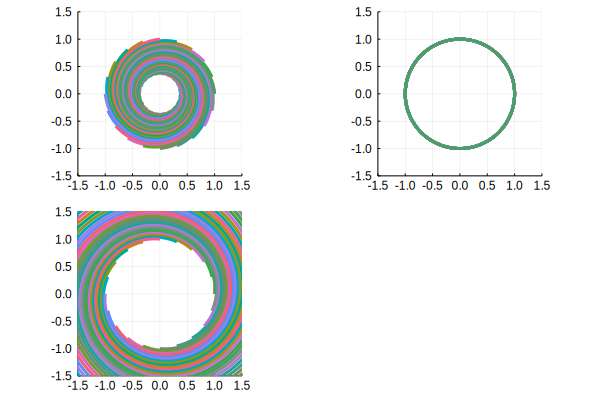

In [2]:
Ω = [0 -1; 1 0]
ε = [-.1, 0, .1]
figs = map(ε) do e
    rhs = (u,p,t) -> (Ω + e*eye(2))*u
    prob = ODEProblem(rhs,[0.0, 0.0],(0.0, 5.0))
    sol = solve(prob,Tsit5())
    fig = plot(sol,vars=(1,2),leg=false,xlims=(-1.5, 1.5),ylims=(-1.5, 1.5))
    for x in x0
        prob = ODEProblem(rhs,x,(0.0, 10.0))
        sol = solve(prob,Tsit5())
        plot!(sol,vars=(1,2),xlims=(-1.5, 1.5),ylims=(-1.5, 1.5))
    end
    fig
end
plot(figs...,aspect_ratio=1)

For $\varepsilon<0$, the spectrum of $\Omega+\varepsilon I$ lies in the left-half plane, and all trajectories have the origin as their $\omega$-limit set. In contrast, for $\varepsilon>0$, the spectrum of $\Omega+\varepsilon I$ lies in the right-half plane, and all trajectories have the origin as their $\alpha$-limit set. For the unperturbed case $\varepsilon=0$, all trajectories form closed orbits. These phase portraits (as "figures") can impossibly be mapped to each other homeomorphically, preserving the direction of time of trajectories. In particular, any homeomorphism would take closed curves to closed curves again.

## Exercise 4

The two matrices are already given in Jordan normal form, but of different type. They cannot be similar for this reason. One way to show topological conjugacy is to proceed as in exercise 1, i.e., define an invariant set for the homeomorphism, trace back trajectories under the first dynamical system until they hit the invariant set, and map forward in time by the second dynamical system. It may be convenient to use a $y=const$-line as invariant set, and solving for the flows explicitly is also no problem, following the rules that we recalled on the first exercise sheet.

Just because it is so beautiful, let us take a look at the phase portraits.

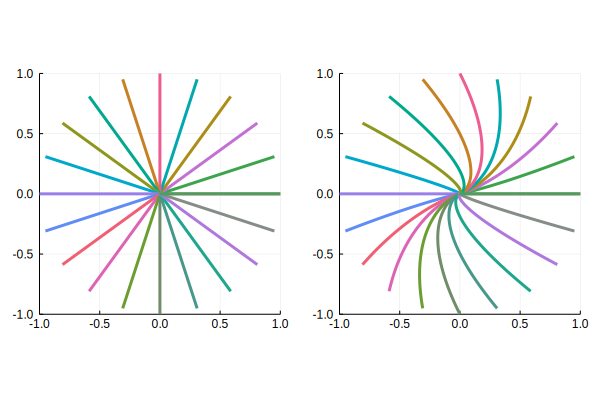

In [3]:
A = -2*eye(2)
B = A + [0 1; 0 0]
α = linspace(0,2π,21)
x0 = [[cos(a), sin(a)] for a in α] # this is a list of initial conditions
figs = map((A, B)) do L
    rhs = (u,p,t) -> L*u
    prob = ODEProblem(rhs,[0.0, 0.0],(0.0, 5.0))
    sol = solve(prob,Tsit5())
    fig = plot(sol,vars=(1,2),leg=false,xlims=(-1., 1.),ylims=(-1., 1.))
    for x in x0
        prob = ODEProblem(rhs,x,(0.0, 10.0))
        sol = solve(prob,Tsit5())
        plot!(sol,vars=(1,2),xlims=(-1., 1.),ylims=(-1., 1.))
    end
    fig
end
plot(figs...,aspect_ratio=1)

Again, the task is to map each line on the left onto the equally colored line on the right.

This shows, by the way, for a special case, how to topologically conjugate two linear dynamical systems that have the same spectrum but are not similar; cf. exercise sheet 4.